In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [10]:
df = pd.read_csv("../Data/BankChurners.csv")
print(df.shape)
df.head()

(10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,1,45,1,3,2,3,0,39,5,...,777,11914.0,1.335,1144,42,1.625,0.061,1,0,0
1,818770008,1,49,0,5,4,1,0,44,6,...,864,7392.0,1.541,1291,33,3.714,0.105,0,1,0
2,713982108,1,51,1,3,4,4,0,36,4,...,0,3418.0,2.594,1887,20,2.333,0.000,1,0,0
3,769911858,1,40,0,4,2,1,0,34,3,...,2517,796.0,1.405,1171,20,2.333,0.760,0,0,1
4,709106358,1,40,1,3,1,3,0,21,5,...,0,4716.0,2.175,816,28,2.500,0.000,1,0,0


In [11]:
# Define the features (X) 
X = df[['Attrition_Flag','Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
        'Marital_Status_Unknown',"Marital_Status_Single","Marital_Status_Married", 'Income_Category', 'Card_Category', 'Months_on_book',
        'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
        'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
        'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

In [12]:
# Initialize the K-Means model with k=5
kmeans = KMeans(n_clusters=2, random_state=0)
# Fit the K-Means model to your data
kmeans.fit(X)
# Get cluster assignments for each data point
cluster_assignments = kmeans.labels_


d:\customer_churn_analysis\my_environment\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
# Add the cluster assignments to your DataFrame
df['Cluster'] = cluster_assignments

# Access cluster centers
cluster_centers = kmeans.cluster_centers_

In [14]:
# Calculate the percentage of "Existing Customer" in each cluster
cluster_Existing_percentage = (df.groupby('Cluster')['Attrition_Flag'].mean() * 100).sort_values()

# Display the cluster percentages
print(cluster_Existing_percentage)

Cluster
0    83.564593
1    85.681947
Name: Attrition_Flag, dtype: float64


d:\customer_churn_analysis\my_environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\customer_churn_analysis\my_environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\customer_churn_analysis\my_environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\customer_churn_analysis\my_environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

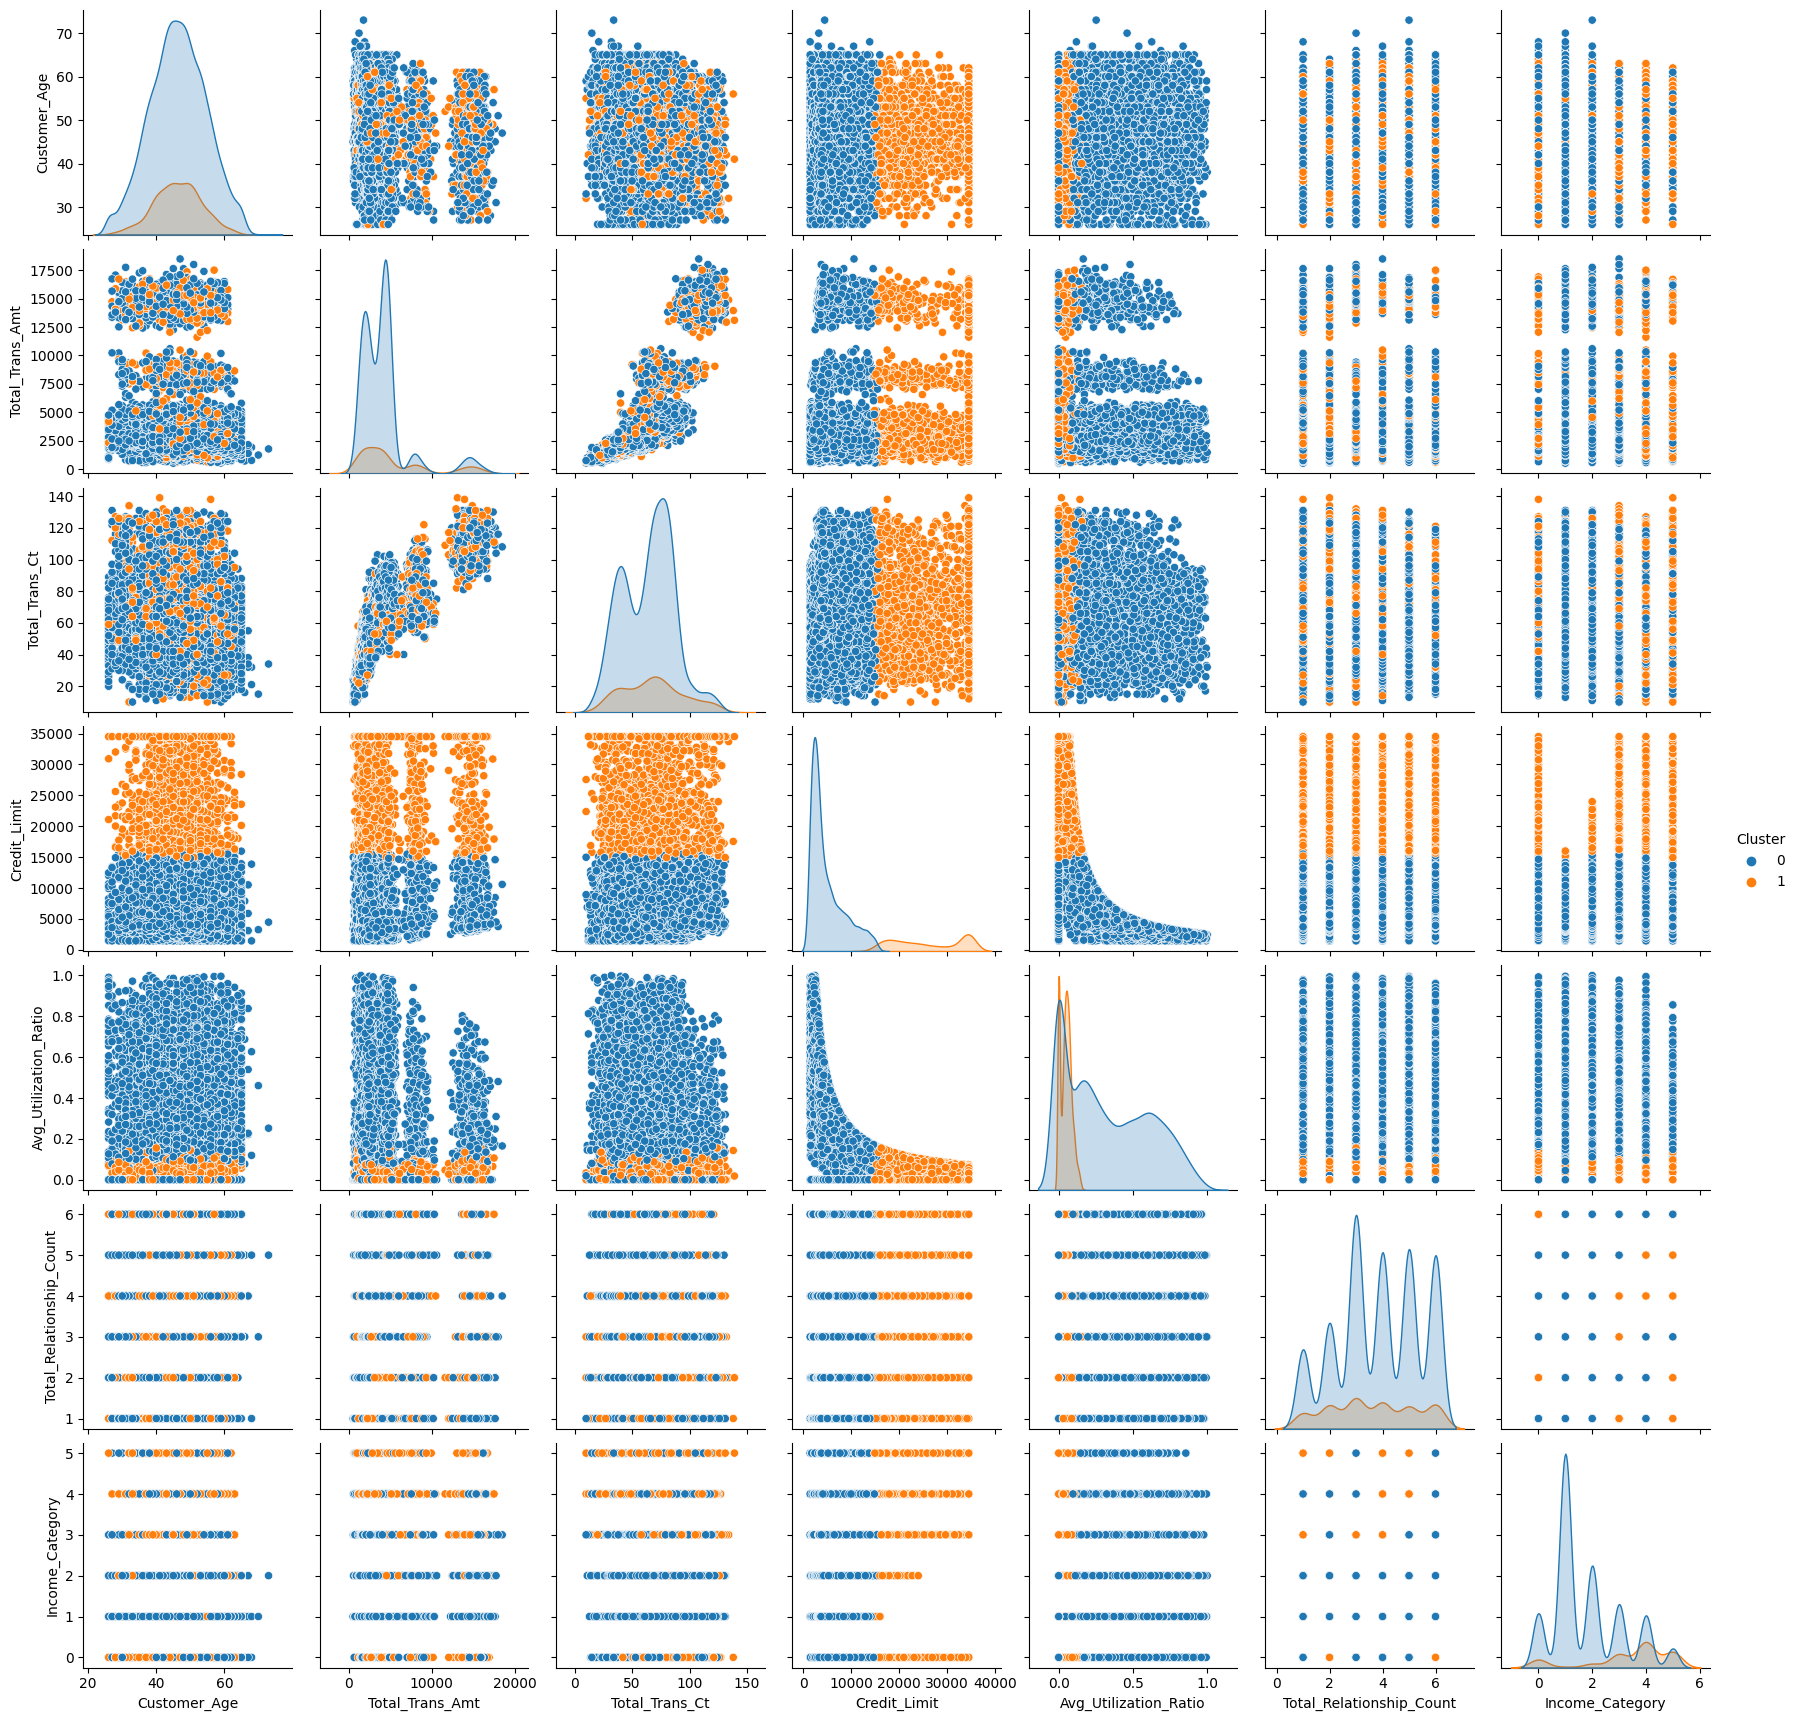

In [15]:

# Select the features for pair plots
selected_features = ['Customer_Age', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Credit_Limit', 'Avg_Utilization_Ratio','Total_Relationship_Count','Income_Category']

# Create a pair plot for selected features
sns.pairplot(df, vars=selected_features, hue='Cluster')
plt.show()
